# Simulation

In [1]:
import os
import sys

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scvelo as scv
from scipy.sparse import csr_matrix

import celloracle as co

In [2]:
#plt.rcParams["font.family"] = "arial"
plt.rcParams["figure.figsize"] = [9,6]
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 600

%matplotlib inline

In [3]:
# Make folder to save plots
save_folder = "figures"
os.makedirs(save_folder, exist_ok=True)

# 1. Load data

Load data from previous notebook.

In [4]:
#load oracle object
oracle = co.load_hdf5("./Pancreas_data.celloracle.oracle")

In [5]:
#load GRNs, which were saved in the Links obect
links = co.load_hdf5("./links.celloracle.links")

# 2. Make predictive models for simulation

We will fit ridge regression models again (after feature selection using p-values).
This process takes less time than the GRN inference in the previous notebook because we only use significant TFs to predict target gene instead of all regulatory candidate TFs. 

In [6]:
#filter based on the p-value 0.001 default
links.filter_links()

In [7]:
#extract TF and target gene info from links object
oracle.get_cluster_specific_TFdict_from_Links(links_object=links)

In [8]:
#fit GRN
oracle.fit_GRN_for_simulation(alpha=10, use_cluster_specific_TFdict=True)

fitting GRN again...
calculating GRN in Alpha


  0%|          | 0/2000 [00:00<?, ?it/s]

genes_in_gem: 2000
models made for 990 genes
calculating GRN in Beta


  0%|          | 0/2000 [00:00<?, ?it/s]

genes_in_gem: 2000
models made for 971 genes
calculating GRN in Delta


  0%|          | 0/2000 [00:00<?, ?it/s]

genes_in_gem: 2000
models made for 864 genes
calculating GRN in Ductal


  0%|          | 0/2000 [00:00<?, ?it/s]

genes_in_gem: 2000
models made for 822 genes
calculating GRN in Epsilon


  0%|          | 0/2000 [00:00<?, ?it/s]

genes_in_gem: 2000
models made for 777 genes
calculating GRN in Ngn3 high EP


  0%|          | 0/2000 [00:00<?, ?it/s]

genes_in_gem: 2000
models made for 949 genes
calculating GRN in Ngn3 low EP


  0%|          | 0/2000 [00:00<?, ?it/s]

genes_in_gem: 2000
models made for 796 genes
calculating GRN in Pre-endocrine


  0%|          | 0/2000 [00:00<?, ?it/s]

genes_in_gem: 2000
models made for 1022 genes


# 3. Trajectories

## 3.1. Propagate GRN signal.
We will propagate the signal of the GRN to infer a directionality of movement. Originally, we will set a perturbation condition, but the library was modified to just iteratively apply the GRN.

In [19]:
# Enter perturbation conditions to simulate signal propagation after the perturbation.

#or nothing if you are using the modified library :) 
oracle.simulate_shift(n_propagation=3, GRN_unit = "cluster")

## 3.2. Visualization

In the step above, we simulated simulated future gene expression values after perturbation. This prediction is based on iterative calculations of signal propagations within the GRN.

Next step, we will calculate the probability of a cell state transition based on the simulated data. Using the transition probability between cells, we can predict how a cell changes after perturbation.

We will use scvelo.

In [26]:
oracle.adata.layers['grn'] = oracle.adata.layers['delta_X'].copy()

In [27]:
scv.tl.velocity_graph(oracle.adata, vkey='grn')

computing velocity graph
    finished (0:00:09) --> added 
    'grn_graph', sparse matrix with cosine correlations (adata.uns)


In [31]:
scv.tl.velocity_embedding(oracle.adata, vkey = 'grn')

computing velocity embedding
    finished (0:00:00) --> added
    'grn_umap', embedded velocity vectors (adata.obsm)


saving figure to file ./figures/scvelo_stream_clipping3.png


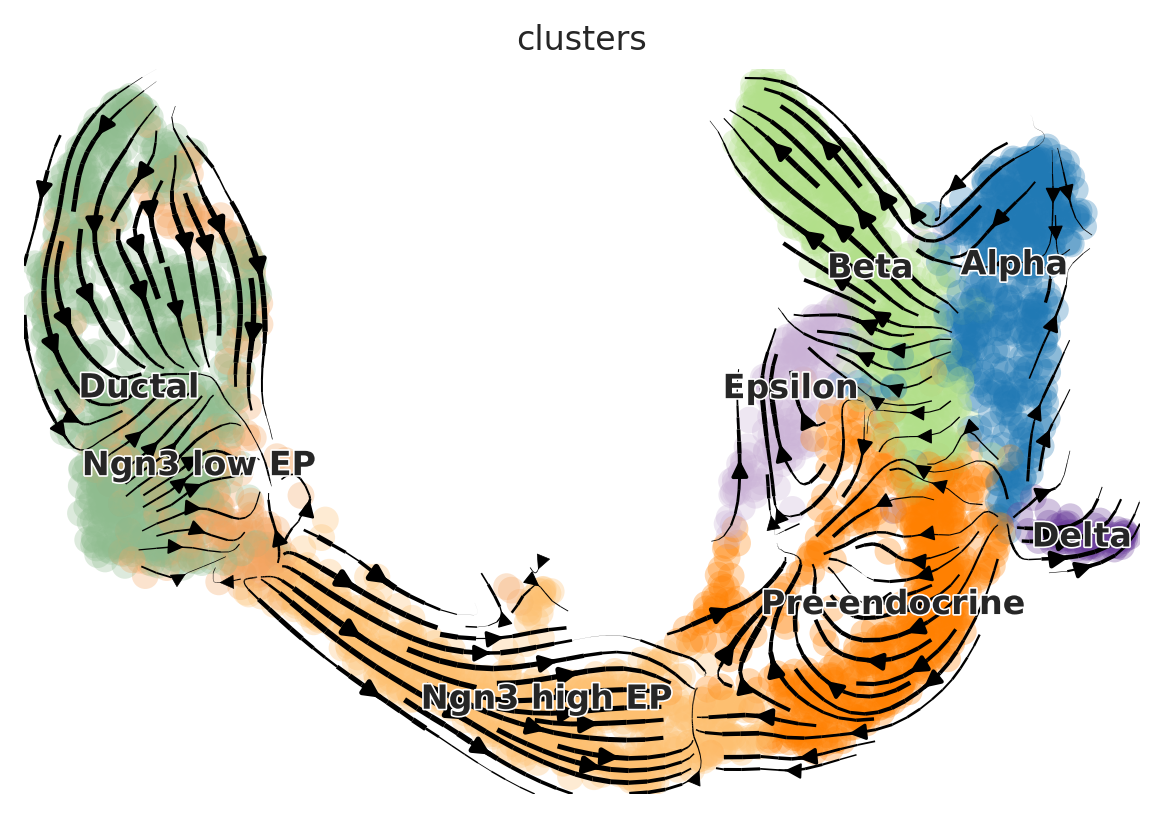

In [34]:
scv.pl.velocity_embedding_stream(oracle.adata, vkey='grn', dpi=120, save='stream_clipping3.png')

saving figure to file ./figures/scvelo_graph_clipping3.png


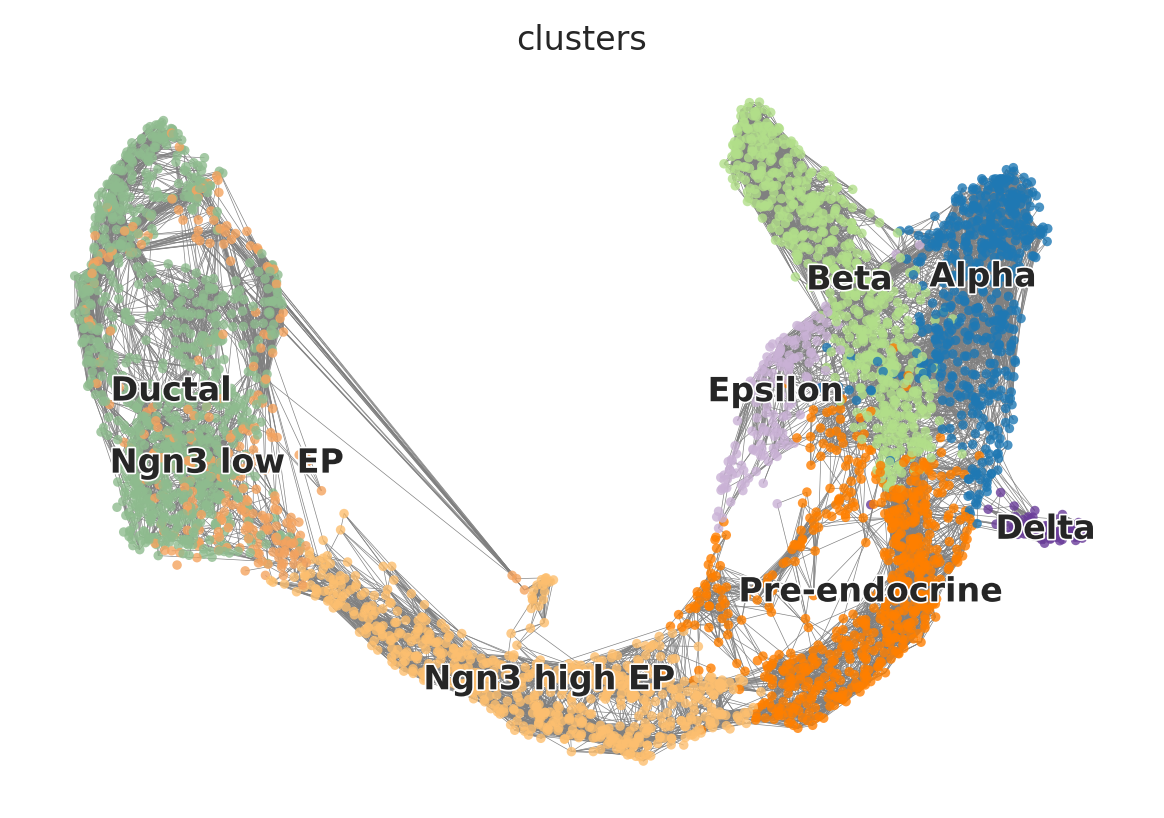

In [39]:
scv.pl.velocity_graph(oracle.adata, threshold=.1, vkey='grn', dpi=120, save='graph_clipping3.png')

saving figure to file ./figures/scvelo_trajectory70_clipping3.png


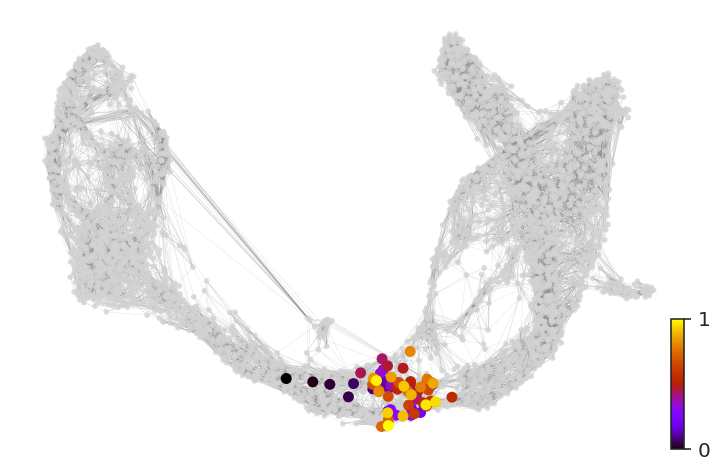

In [42]:
x, y = scv.utils.get_cell_transitions(oracle.adata, basis='umap', starting_cell=70, vkey='grn', random_state = 27)
ax = scv.pl.velocity_graph(oracle.adata, c='lightgrey', edge_width=.05, show=False, vkey='grn')
ax = scv.pl.scatter(oracle.adata, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax, vkey='grn', save='trajectory70_clipping3.png')

saving figure to file ./figures/scvelo_trajectory190_clipping3.png


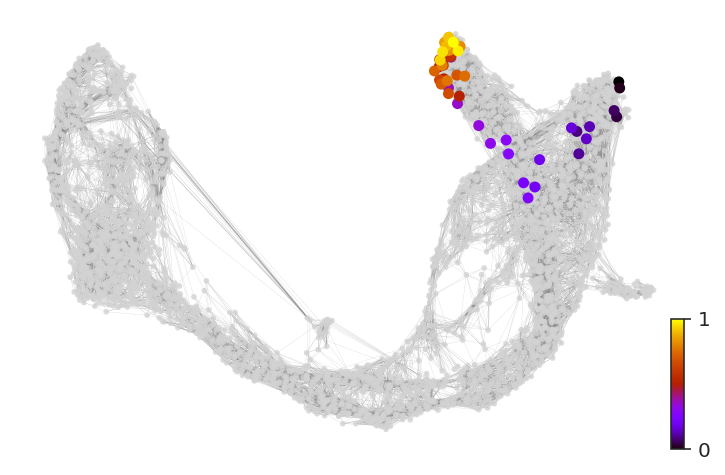

In [41]:
x, y = scv.utils.get_cell_transitions(oracle.adata, basis='umap', starting_cell=190, vkey='grn', random_state = 27)
ax = scv.pl.velocity_graph(oracle.adata, c='lightgrey', edge_width=.05, show=False, vkey='grn')
ax = scv.pl.scatter(oracle.adata, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax, vkey='grn', save='trajectory190_clipping3.png')

saving figure to file ./figures/scvelo_trajectory2152_clipping3.png


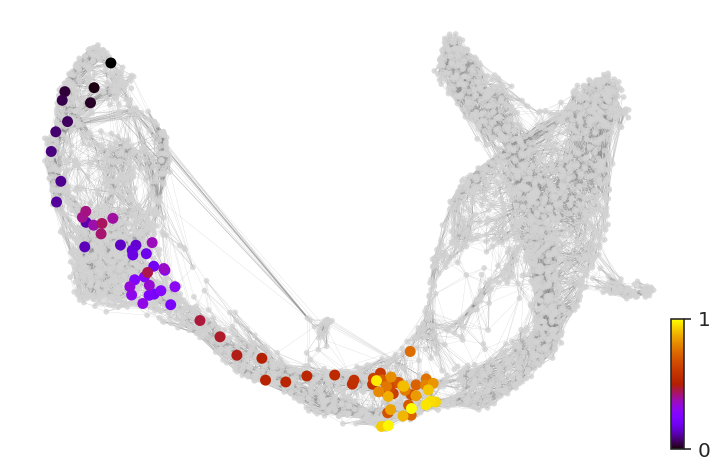

In [43]:
x, y = scv.utils.get_cell_transitions(oracle.adata, basis='umap', starting_cell=2152, vkey='grn', random_state = 27)
ax = scv.pl.velocity_graph(oracle.adata, c='lightgrey', edge_width=.05, show=False, vkey='grn')
ax = scv.pl.scatter(oracle.adata, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax, vkey='grn', save='trajectory2152_clipping3.png')

saving figure to file ./figures/scvelo_trajectory3350_clipping3.png


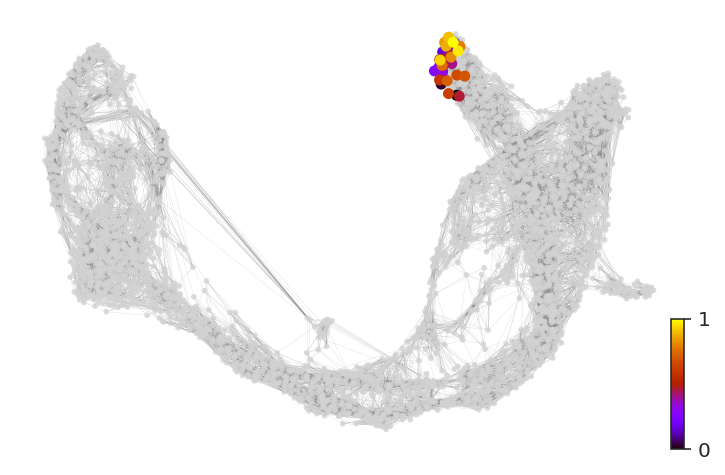

In [44]:
x, y = scv.utils.get_cell_transitions(oracle.adata, basis='umap', starting_cell=3350, vkey='grn', random_state = 27)
ax = scv.pl.velocity_graph(oracle.adata, c='lightgrey', edge_width=.05, show=False, vkey='grn')
ax = scv.pl.scatter(oracle.adata, x=x, y=y, s=120, c='ascending', cmap='gnuplot', ax=ax, vkey='grn', save='trajectory3350_clipping3.png')

## 4. Sankey diagram and trajectories

In [45]:
from celloracle.trajectory.sankey import sankey
from celloracle.trajectory.oracle_core import _deal_with_na
from celloracle.trajectory.oracle_utility import _adata_to_color_dict

from scvelo.tools.transition_matrix import transition_matrix

In [46]:
#initial parameters for simulation (USER INPUT)
n_steps=100
n_duplication = 5
n_neighbors = 30

In [47]:
#prepare the indices
n_cells = oracle.adata.X.shape[0]
start_cell_id_array = np.repeat(np.arange(n_cells), n_duplication)

#prepare transition matrix
tr_matrix = transition_matrix(oracle.adata, vkey='grn')
transition_prob = _deal_with_na(tr_matrix.toarray())
T = csr_matrix(transition_prob)
T.indices = tr_matrix.indices
T.indptr = tr_matrix.indptr

In [49]:
np.random.seed(1)
#compute trajectories
transitions = []
for i in start_cell_id_array:
    X = [i]
    for _ in range (n_steps):
        t = T[X[-1]]
        indices, p = t.indices, t.data
        idx = np.argsort(t.data)[::-1][:n_neighbors]
        indices, p = indices[idx], p[idx]
        p /=np.sum(p)
        ix = np.random.choice(indices, p = p)
        X.append(ix)
    transitions.append(X)
    
#results:
trajectory_df = pd.DataFrame(transitions)
trajectory_df.index = trajectory_df[0]

In [51]:
#prepare data for sankey diagram
mcmc_transition_cluster = pd.DataFrame(np.array(oracle.adata.obs['clusters'])[trajectory_df.values])
mcmc_color_dict = _adata_to_color_dict(oracle.adata, 'clusters')
df = mcmc_transition_cluster.iloc[:, [0, -1]]
df.columns = ["start", "end"]
order = ['Ductal','Ngn3 low EP', 'Ngn3 high EP','Pre-endocrine',
         'Delta','Epsilon','Alpha','Beta']

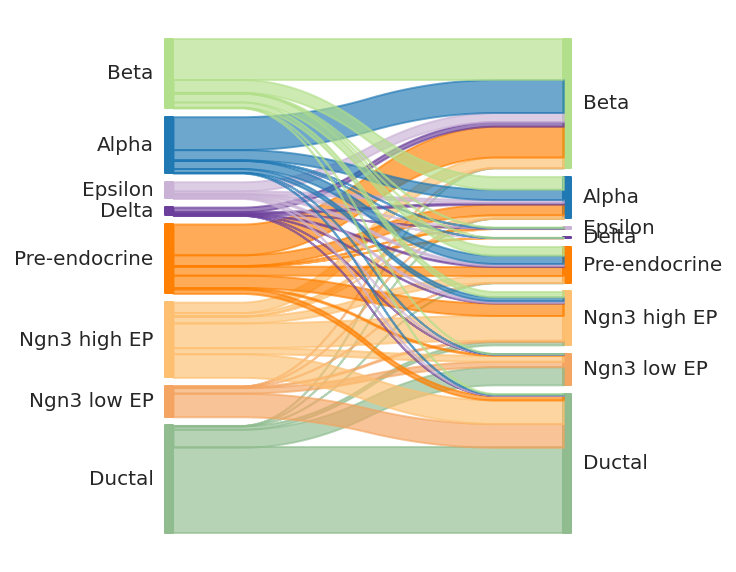

In [57]:
#sankey diagram
plt.figure(figsize=[4, 5])
sankey(left=df['start'], right=df['end'],
               aspect=1, fontsize=10,
               colorDict=mcmc_color_dict,
               leftLabels=order, rightLabels=order)

In [58]:
def _plot_one_trajectory(adata, trajectory_df, cell_ix_in_mcmctid, time_range, args={}, embedding = 'X_umap'):
        tt = trajectory_df.iloc[cell_ix_in_mcmctid,:].values[time_range]
        plt.plot(adata.obsm[embedding][:,0][tt], adata.obsm[embedding][:,1][tt], **args)

In [59]:
#plot trajectories
def plot_mc_result_as_trajectory(adata, trajectory_df, cell_name, time_range, args={}, embedding = 'X_umap'):
        """
        Pick up several timepoints in the cell state-transition simulation and plot as a line plot.
        This function can be used to visualize how cell-state changes after perturbation focusing on a specific cell.
        Args:
            cell_name (str): cell name. chose from adata.obs.index
            time_range (list of int): the list of index in Markov simulation
            args (dictionary): dictionary for the arguments for matplotlib.pyplit.plot.
                See matplotlib documentation for details (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).
        """
        cell_ix = np.where(adata.obs.index == cell_name)[0][0]
        cell_ix_in_mcmctid = np.where(trajectory_df.index == cell_ix)[0]

        # plot all cells in gray color
        plt.scatter(adata.obsm[embedding][:,0], adata.obsm[embedding][:,1], s=1, c="lightgray")


        for i in cell_ix_in_mcmctid:
            _plot_one_trajectory(adata, trajectory_df, i, time_range, args)

        # plot cell of interest (initiation point of simulation) in red color
        plt.scatter(adata.obsm[embedding][cell_ix,0], adata.obsm[embedding][cell_ix,1], s=50, c="red")

cell AACCGCGAGGATGGTC


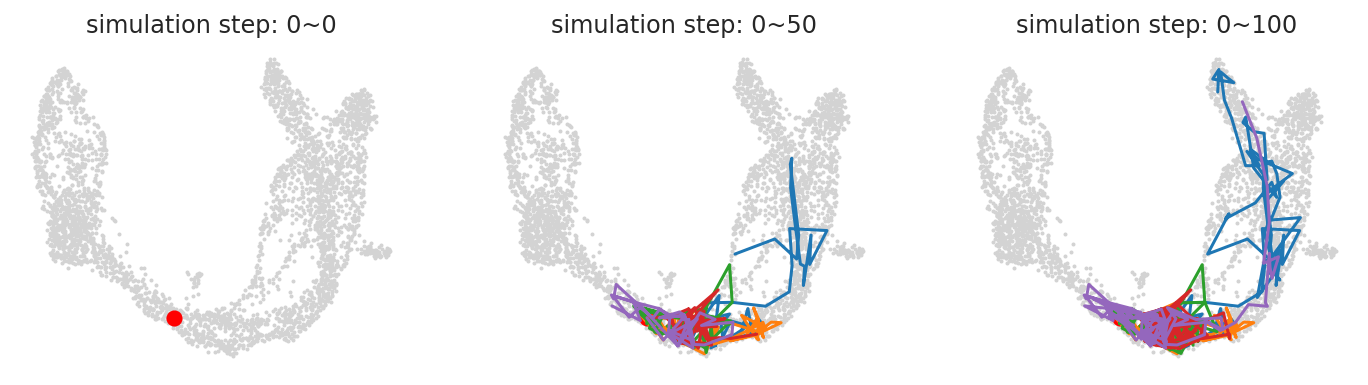

cell ACACCAAGTATAATGG


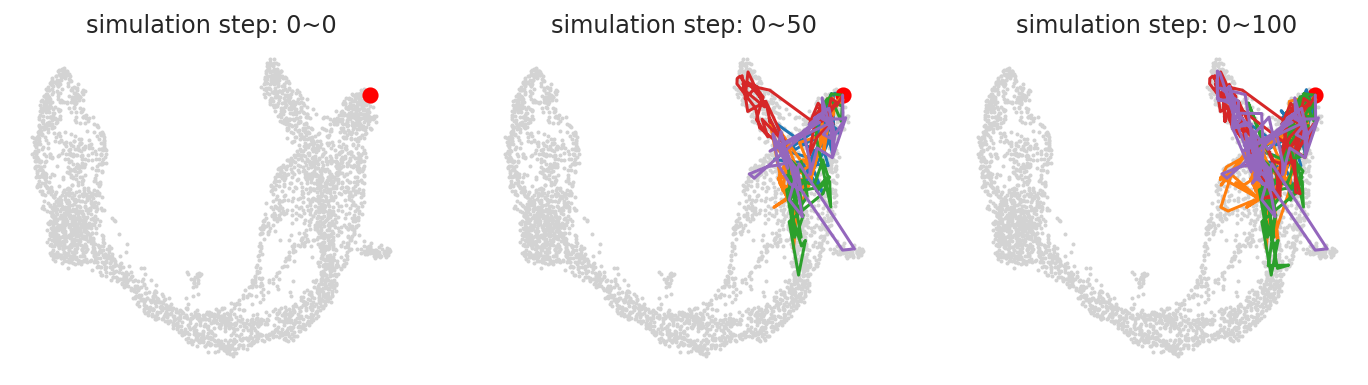

cell GATCGCGAGCTGAACG


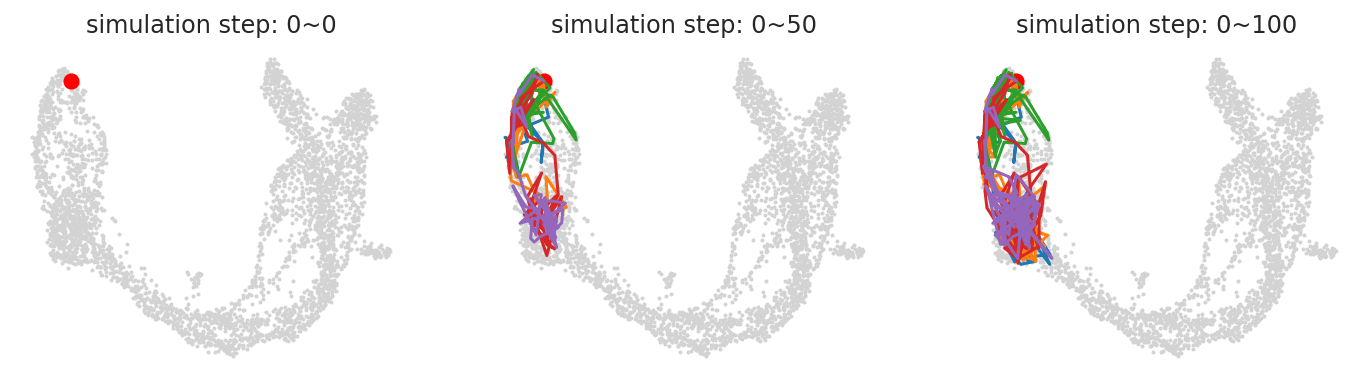

cell TGCCCATGTGCCTGGT


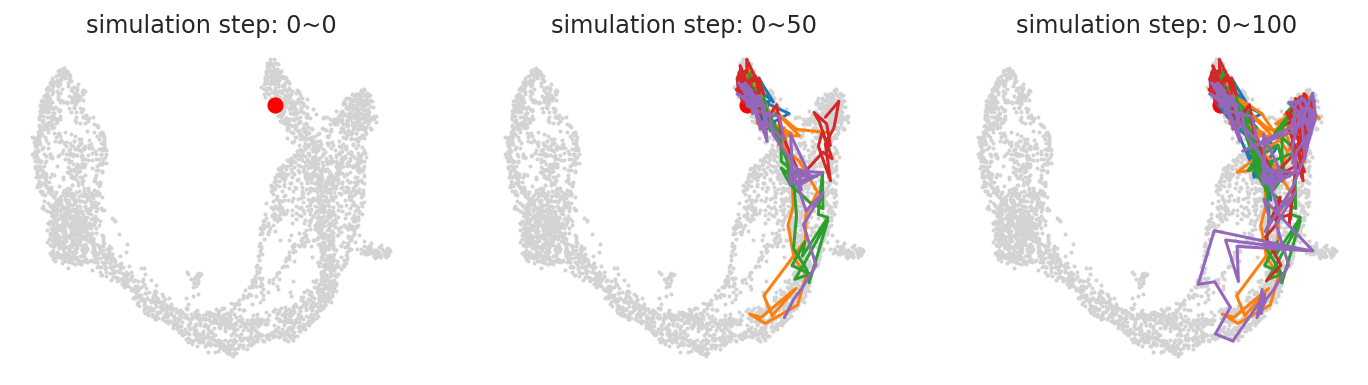

In [61]:
# Randomly pick up cells
np.random.seed(1)
cells = oracle.adata.obs.index.values[[70,190, 2152, 3350]]

# Visualize the simulated results of cell transition after perturbation
for k in cells:
    print(f"cell {k}")
    plt.figure(figsize=[12, 3])
    for j, i in enumerate([0, 50, 100]): # time points
        plt.subplot(1, 3, (j+1))
        plot_mc_result_as_trajectory(adata = oracle.adata, trajectory_df = trajectory_df, cell_name = k, time_range = range(0, i))
        plt.title(f"simulation step: 0~{i}")
        plt.axis("off")
    plt.show()